#MODULO 01

In [ ]:
#Biblioteca de Análise de Dados
import pandas as pd
#Bibliotecas de Criação de Visualizações Gráficas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
#Bibliotecas de Apresentação de Informações no Google Colab
from google.colab import widgets, output

pd.options.display.float_format = "{:.2f}".format

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   RESET = '\033[0m'

##Aula 01
---

O objetivo desta aula é importar os dados e iniciar a análise exploratória dos dados afim de endenter melhor as informações desta base de dados.

- Iremos analisar e manipular dados reais da área da saúde. 
Serão avaliados os gastos hospitalares de todo o Brasil a partir de uma base de dados obtida do site do governo brasileiro.

*   PROCEDIMENTOS HOSPITALARES DO SUS - POR LOCAL DE INTERNAÇÃO - BRASIL:
    *   Valor total por Ano/mês atendimento segundo Unidade da Federação
Período: Jan/2008-Mar/2021
    *   Valor total por Ano/mês processamento segundo Unidade da Federação
Período: Jan/2008-Mar/2021

[Acesso direto a base selecionada](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi) para realização a análise exploratória nos dados: 

###Preparação do Ambiente:
---

###Importação das bibliotecas e Exploração inicial:
---

In [ ]:
url_dados = 'https://github.com/JeffersonOliveira/Bootcamp_DS_Alura_2021_05/blob/b508ede5b36ddbbe8816e08974b649604f11b1da/Modulo_01-Python%20e%20pandas%20para%20an%C3%A1lise%20de%20dados%20reais/Datasets/A003954189_28_143_208.csv?raw=True'
data = pd.read_csv(url_dados,
                   encoding='ISO-8859-1', 
                   skiprows=3, 
                   sep=";",
                   skipfooter=12, 
                   engine="python", 
                   thousands=".", 
                   decimal=",")

###Visualizando as primeiras e últimas colunas do dataset:
---


In [ ]:
guias = widgets.TabBar(['Estrutura', 'Registros Iniciais','Registros Finais','Media dos Registros'], location='top')

with guias.output_to('Estrutura'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nEstrutura da Base de Dados:\n'+color.RESET)
    print(data.info())
    print(color.BOLD+'\n Shape do Dataset lido: {}'.format(data.shape)+color.RESET)
    
with guias.output_to('Registros Iniciais'):
    display(data.head())
with guias.output_to('Registros Finais'):
    display(data.tail())

with guias.output_to('Media dos Registros'):
    display(data.mean())
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Estrutura da Base de Dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(159), object(2)
memory usage: 34.1+ KB
None

 Shape do Dataset lido: (27, 161)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,102298314.76,100260145.30,95917106.56,102331615.05,93971904.79,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86092502.24,100579287.65,102609965.59,104401019.54,117458292.46,108853890.98,111760506.80,119992419.94,111797400.70,130155185.16,12764391179.92
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,19870933.20,18913862.69,19591383.84,18935437.09,17230688.81,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17363192.43,18858844.44,19877080.68,19247894.51,19497210.85,22023126.25,19629591.55,21693311.15,24337295.63,25168195.34,2324525096.33
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,16314811.22,16763581.32,15608982.84,15855641.23,15823328.54,15032737.51,15259436.50,15066106.66,14906973.08,12563655.61,13632848.78,13215428.53,16834650.98,19704915.36,20746227.60,22727405.20,20506039.58,19583803.46,19120141.68,18349376.92,19611032.61,2180119781.15
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

<IPython.core.display.Javascript object>

Uma vez que já temos os dados formatados e analisados, iremos passar para próxima análise. 

Decidiu-se escolher a data de "Jan/2008" para análise os valores de gastos na área da saúde de cada Estado.

In [ ]:
#data.info(null_counts=True, verbose=True) --> O data.info( foi ativado para saber qual era o ANO/MES que estava comprometido - se tratava de um objeto ao invés de ser um float64)

Visualizando problema a coluan/ linha que está com dados como objeto:

A Partir do dado acima nos chamou atenção a data de "2009/Set" uma vez que ele é o único objeto e deveria ser float64 como os demais.
- No gráfico abaixo se vê que no index "1"
```
periodo = str('2009/Set')
data.sort_values(periodo, ascending=False).plot(x="Unidade da Federação", y=periodo, kind="bar", figsize=(10,7))
```



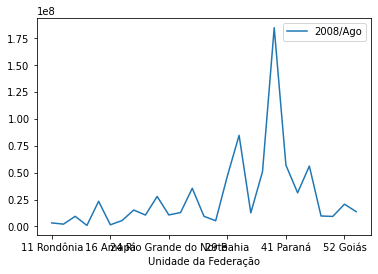

In [ ]:
data.plot(x="Unidade da Federação", y="2008/Ago")

### Análise do mês de Agosto de 2008:
Decidiu-se durante a aula utilizar a data Ago/2008, iremos analisar esse período através de um gráfico com as informações de Unidade Federativa por valor gastos no período.

Já no gráfico abaixo pocurei melhorar a apresentação das informações de forma a facilitar o entendimento:

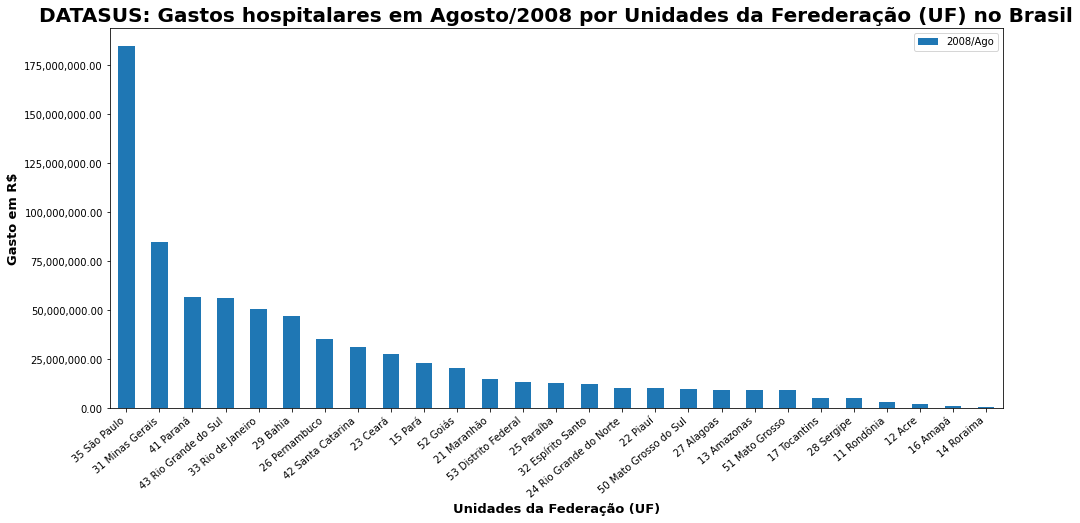

In [ ]:
ax = data.sort_values('2008/Ago', ascending=False).plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(16,7), grid=False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.xaxis.set_label_text("Unidades da Federação (UF)", fontsize = "13",  weight=(700))
ax.yaxis.set_label_text("Gasto em R$", fontsize = "13", weight=(700))

plt.xticks(rotation=40, ha='right', fontsize="10")
plt.title("DATASUS: Gastos hospitalares em Agosto/2008 por Unidades da Ferederação (UF) no Brasil", fontsize="20",  weight=(700) )
plt.show()

Exibo aqui também a média de gastos hospitalares em Ago/2008 para todos os Estados:

In [ ]:
data_media_2008_Ago = data['2008/Ago'].mean()
print("Média de Gastos em Ago/2008 R$ {:7,.2f}".format(data_media_2008_Ago))

Média de Gastos em Ago/2008 R$ 27,800,320.31


###Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.
  - Item já cumprido no gráfico anterior.

###Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente:

  - O mês mais recente do dataset é o de março/2021.
  
  Iremos realizar a plotagem dos dados desse periodo para analisarmos o gráfico:

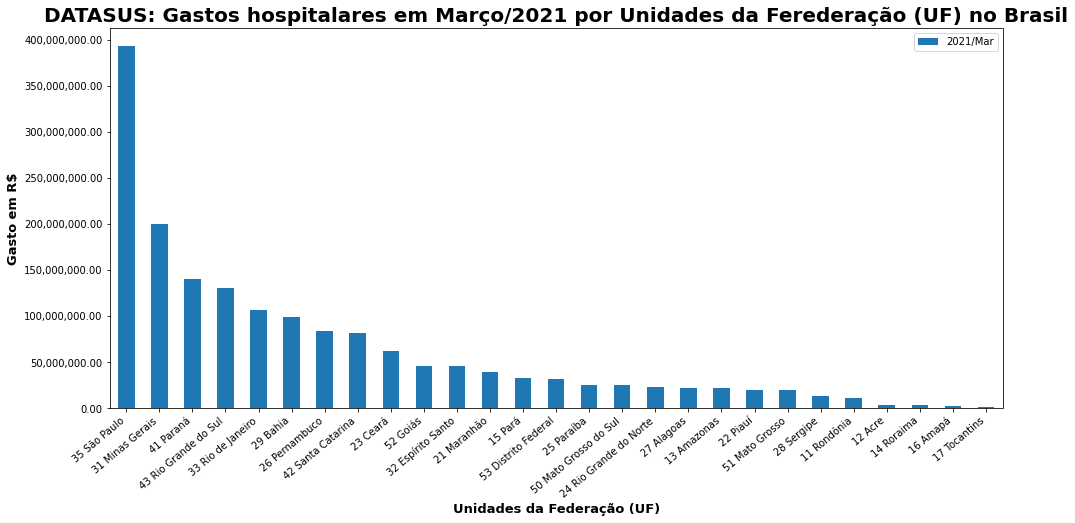

In [ ]:
mes = '2021/Mar'
ax = data.sort_values(mes, ascending=False).plot(x="Unidade da Federação", y=mes, kind="bar", figsize=(16,7), grid=False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.xaxis.set_label_text("Unidades da Federação (UF)", fontsize = "13",  weight=(700))
ax.yaxis.set_label_text("Gasto em R$", fontsize = "13", weight=(700))

plt.xticks(rotation=40, ha='right', fontsize="10")
plt.title("DATASUS: Gastos hospitalares em Março/2021 por Unidades da Ferederação (UF) no Brasil", fontsize="20",  weight=(700) )
plt.show()

###O que aprendemos nesta aula?
  - Como utilizar o Tabnet para buscar dados da saúde Brasileira;
  - Como utilizar o google Colaboratory;
  - Como ler um arquivo CSV com Pandas;
  - Como ler um arquivo CSV com caracteres especiais do idioma português;
  - Como ignorar o cabeçalho de um arquivo CSV;
  - O que são DataFrame;
  - Os desafios de ler um arquivo do mundo real;
  - Como formatar a impressão dos dados de um DataFrame Pandas;
  - Como plotar um gráfico com o Pandas;
  - Como formatar a sua visualização;
  - Como alterar os ticks do seu gráfico utilizando o Matplotlib.

### Desafio Extra: Realizar a exploração também por município

## [site para download do dataset](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qibr.def)

Opções selecionadas:
  - Linhas: **Município**;
  - Coluna: **Ano/mês processamento**
  - Conteúdo: **Valor total**
Em: PERÍODOS DISPONÍVEIS
  - Selecionar todos os meses.

  Fazer o mesmo substituindo a coluna **Ano/mês processamento**

In [188]:
url_dados = 'https://github.com/JeffersonOliveira/Bootcamp_DS_Alura_2021_05/blob/f8e537bf66c5cc902a3d99850b7abbeab875ff20/Modulo_01-Python_pandas_para_analise_de_dados_reais/Datasets/A173127189_28_143_208_Municipio_Ano_mes_processamento_a_partir_de_2008.csv?raw=True'
data = pd.read_csv(url_dados,
                   encoding='ISO-8859-1', 
                   skiprows=3, 
                   sep=";",
                   skipfooter=12, 
                   engine="python", 
                   thousands=".", 
                   decimal=",")

In [189]:
guias = widgets.TabBar(['Estrutura', 'Registros Iniciais','Registros Finais','Media dos Registros'], location='top')

with guias.output_to('Estrutura'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nEstrutura da Base de Dados:\n'+color.RESET)
    print(data.info())
    print(color.BOLD+'\n Shape do Dataset lido: {}'.format(data.shape)+color.RESET)
    
with guias.output_to('Registros Iniciais'):
    display(data.head())
with guias.output_to('Registros Finais'):
    display(data.tail())

with guias.output_to('Media dos Registros'):
    display(data.mean())
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Estrutura da Base de Dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Columns: 161 entries, Município to Total
dtypes: float64(1), object(160)
memory usage: 4.4+ MB
None

 Shape do Dataset lido: (3580, 161)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Município,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,110001 Alta Floresta D'Oeste,51889.60,54196.24,62343.99,61587.40,67340.02,64608.92,63764.72,63000.83,61147.34,64520.93,65473.61,68603.56,70212.40,67695.89,66791.64,72047.58,64271.13,75064.27,69028.80,66637.59,75548.53,69604.36,71260.18,64441.92,62394.15,66660.44,67064.82,69495.93,67609.22,70198.07,67192.18,69058.41,69246.01,70466.67,65280.86,69152.58,72831.47,58533.38,71387.84,...,45582.53,42264.51,56190.93,57756.72,64442.59,54452.20,60298.91,56218.00,48924.35,51197.16,60808.93,55532.56,41393.52,43317.89,73338.43,65419.39,66829.16,67588.88,69835.04,68974.03,54726.33,53857.47,49009.86,41883.92,36130.46,34063.92,38244.89,31136.06,27748.08,19925.99,47051.03,63285.94,63114.74,41721.02,30018.36,47878.56,91689.91,49087.84,75404.08,9235050.34
1,110037 Alto Alegre dos Parecis,-,-,-,-,-,-,-,-,-,-,-,-,-,3147.25,3324.13,-,3408.00,3392.75,3401.90,3374.45,3398.85,3333.28,-,2256.75,-,6652.84,2543.42,-,2619.66,22443.00,26868.10,22631.33,15522.64,20056.11,16025.71,22130.72,24159.93,25901.42,20528.23,...,9287.25,9432.81,13958.95,12617.91,16062.51,13490.61,5695.05,9142.24,9201.95,6892.99,10243.49,6456.35,8898.89,4574.43,10549.28,10737.21,8398.00,16258.63,11872.03,14817.78,11155.03,9346.72,9879.55,5130.47,9587.46,10266.47,6104.38,6922.38,4873.94,9010.86,11176.12,14255.11,13526.32,6997.25,10070.78,20901.10,33719.44,22175.60,35041.43,1824227.92
2,110040 Alto Paraíso,-,658.62,-,-,-,-,-,-,-,-,-,-,5952.10,7586.27,12345.42,16839.47,7319.74,7137.61,6593.83,7053.70,7983.55,6450.38,8253.60,11662.75,7377.42,8515.87,5859.98,13715.33,13234.11,10016.57,20709.04,15187.59,14178.71,7774.74,14216.93,9179.94,8163.08,7434.86,18842.90,...,16643.99,14914.20,10283.40,16714.47,16349.54,13287.21,13589.70,11618.11,176.88,1003.34,1083.36,1601.74,9077.99,10825.92,15846.37,20652.66,15920.66,16572.47,17720.03,12949.94,9923.32,6591.19,553.30,5667.69,9325.89,10835.71,10256.26,5853.94,4809.57,10096.83,17343.79,23064.53,11581.29,9804.68,7215.84,10316.12,11741.68,15823.53,42518.99,1523275.22
3,110034 Alvorada D'Oeste,-,31146.93,-,-,-,-,19973.58,20906.06,-,32087.68,30989.13,38436.15,35309.89,30404.54,41759.59,40020.35,40900.31,35969.34,36346.96,33743.66,20832.60,30249.22,35603.07,31485.11,41275.81,40484.77,37778.45,41242.46,30158.68,26057.24,26000.95,34340.11,36422.99,25844.94,39228.14,44617.16,33900.57,26109.98,37171.35,...,17625.08,13577.86,15983.95,12578.28,18868.22,25014.66,14431.34,23536.77,20242.10,21935.09,16811.76,10097.24,7906.53,11400.38,15068.55,17804.65,15646.06,14794.84,13431.38,11419.65,13588.97,16910.82,13716.51,15666.77,10955.07,11938.18,12685.63,2312.12,5640.19,6104.08,5502.14,5999.83,10123.99,2540.29,9642.47,13263.74,-,-,-,2982096.54
4,110002 Ariquemes,150366.00,120718.95,122319.07,139961.10,177664.45,176213.32,146534.95,107606.13,139838.55,139811.35,120799.13,267507.13,187367.55,182342.04,233168.10,214297.49,199505.41,176479.18,180194.05,164772.91,176055.45,196327.59,179831.39,181672.42,177201.28,253382.56,253998.28,180050.37,287532.13,301590.26,459093.93,182843.10,379174.71,291087.83,288245.50,229216.87,278205.24,233673.43,292204.07,...,318289.43,328985.07,372754.87,355390.91,384283.77,354675.62,343383.88,390804.00,363808.77,415932.73,354117.43,360447.24,348305.29,338095.92,363500.58,420896.75,454105.91,355426.82,351988.43,343097.10,345129.93,395629

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Município,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
3575,522185 Valparaíso de Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1925.19,3739.24,7193.18,11540.48,14942.27,12499.74,10876.00,1867.69,23577.38,74812.34,41670.54,16226.71,13215.62,16170.54,26145.98,13116.31,57520.52,98753.78,445793.51
3576,522200 Vianópolis,31175.93,30352.68,29570.19,29182.41,36640.40,38658.54,39195.69,37892.29,38617.61,32914.86,31855.32,39735.24,33365.97,33780.15,32993.52,38296.41,37640.68,37558.49,43463.84,49842.61,28880.95,38294.81,40382.02,36078.52,36257.38,35121.12,37619.47,55560.02,37008.71,36391.74,36394.15,36396.11,39726.28,38772.52,46030.01,37553.44,50819.90,38087.49,45172.58,...,23950.49,24865.79,34837.38,30555.43,28560.02,30662.90,25235.01,29888.28,27118.34,30679.70,21874.43,23174.18,32328.84,30332.85,27458.86,25022.66,25510.57,25730.60,20273.79,20016.53,24797.58,25532.17,18515.23,23983.13,27045.43,29818.36,27709.30,23541.48,21556.17,17513.39,14639.02,23013.18,22121.08,22223.71,20999.31,23765.83,19990.75,19549.00,55696.97,4643978.15
3577,522205 Vicentinópolis,8630.42,7661.39,9732.05,5892.06,10371.60,10737.76,8739.54,10138.00,8870.01,10852.81,5674.00,13929.74,820.09,-,-,-,-,8158.89,1171.46,765.35,585.73,28100.74,12355.40,3517.53,19640.30,-,19833.61,9361.37,11205.40,-,-,-,4394.95,4452.11,6890.14,3524.05,5324.61,2117.31,7193.31,...,1354.31,15861.36,8801.33,8171.28,10532.35,8340.33,8032.85,10063.66,7024.62,5096.23,11733.27,9116.75,8498.64,8363.74,6919.78,8493.39,8978.20,10351.56,9103.30,10268.53,12726.21,16689.34,13725.94,13167.27,10291.43,13937.23,14001.67,12639.70,14346.73,12669.53,12923.69,12416.62,9540.64,10543.10,8132.32,9224.03,6649.75,-,-,1132095.20
3578,522220 Vila Boa,7849.74,6426.26,15655.72,11325.67,11353.02,10681.85,4651.86,9191.88,8268.43,8817.99,8033.97,10974.31,10375.70,9766.66,10590.23,11708.10,11477.92,12543.80,13467.96,12094.66,11071.21,12084.89,11561.21,12053.99,12813.24,11699.10,12074.29,12655.15,13411.60,4943.79,805.69,1499.71,1581.22,2135.94,5412.53,4150.43,1426.76,749.26,1108.13,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,498081.86
3579,530010 Brasília,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,15048607.23,11343166.62,14727561.06,12448821.12,10378991.59,13844384.56,13014468.49,15199322.19,15839446.00,14075642.84,15070287.19,14487053.32,14794759.93,13970147.70,12231919.68,14152357.41,12797956.47,14766108.89,14251503.37,13992321.87,13029712.13,13731431.47,14492891.90,13708967.72,13154297.48,14017191.90,13892860.69,13685193.15,12596227.92,13776613.55,...,17127571.95,18222787.66,20340897.78,20522181.19,20343407.23,21542121.59,22301468.16,23318726.05,20307075.79,18600258.14,16518323.98,13970506.60,20192152.35,18496333.16,22191795.70,18562231.92,20360779.48,20187082.38,22216154.63,23309181.24,17870194.68,17859596.85,19851940.18,18769437.77,22341629.09,20643441.06,22947163.99,21536505.16,19058243.91,22704335.27,25269773.34,26526196.39,20056592.11,20856249.30,20459325.27,22991567.76,23527050.29,22766952.62,31831917.45,2592422853.56


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Total   48179262.61
dtype: float64

<IPython.core.display.Javascript object>

##Aula 02

In [ ]:
url_dados = '?raw=True'
data = pd.read_csv(url_dados,
                   encoding='ISO-8859-1', 
                   skiprows=3, 
                   sep=";",
                   skipfooter=12, 
                   engine="python", 
                   thousands=".", 
                   decimal=",")

##Aula 03

##Aula 04

##Aula 05